<a href="https://colab.research.google.com/github/JuliaPPfeiffer/DS4002-Project1/blob/main/sentiment_analysis_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

This file contains code used to perform exploratory data analysis.

              username                 timestamp  \
0                 Gary  2024-11-29T23:30:57.000Z   
1       HireSamCassell  2024-11-29T23:30:57.000Z   
2  Smart Life Trending  2024-11-29T23:30:57.000Z   
3           QWIKET NFL  2024-11-29T23:30:57.000Z   
4      Scott Petrak ct  2024-11-29T23:30:57.000Z   

                                                text              team  \
0  I'm calling it right now. The Cleveland Browns...  Cleveland Browns   
1  That's a Cleveland Browns type way to lose a g...  Cleveland Browns   
2  These Are the Coolest Gifts on Everyone's Wish...  Cleveland Browns   
3  #nfl #Browns The upcoming game between the Cle...  Cleveland Browns   
4  #Browns WR Jerry Jeudy discusses wanting out o...  Cleveland Browns   

  sentiment         confidence  \
0  positive  0.761263251304627   
1  negative   0.69503664970398   
2  positive  0.770186603069305   
3  positive  0.512993693351746   
4  negative  0.811408400535584   

                                 robe

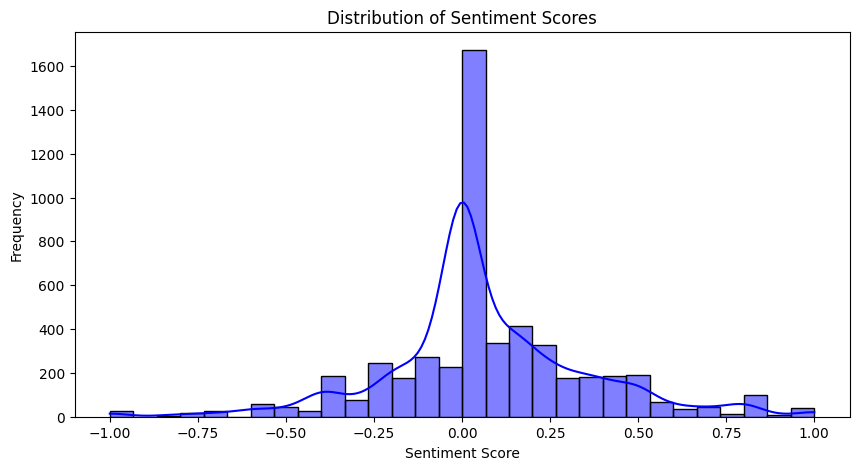

<ipython-input-8-fedd8a6e96b8>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nfl_data['Sentiment_Category'], palette=['green', 'red', 'grey'])


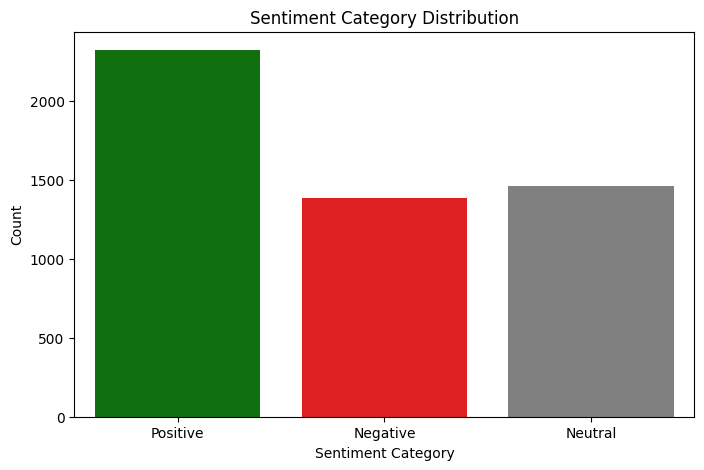

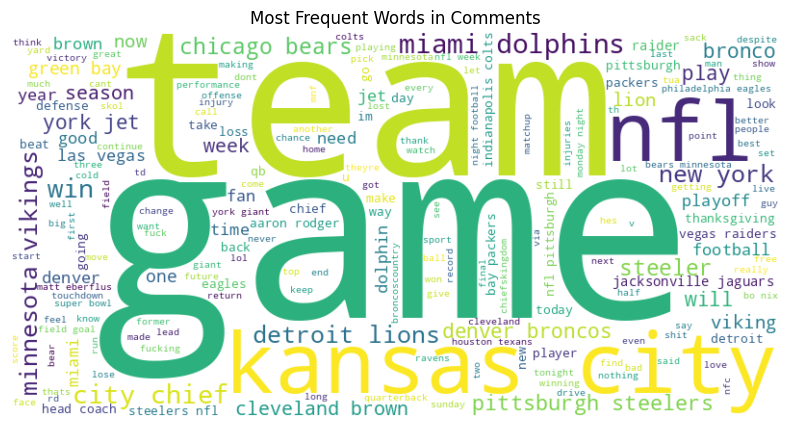

In [ ]:
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#load in data
nfl_data = pd.read_csv("/content/nfl_sentiments.csv")

print(nfl_data.head())

#clean data
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'&#\d+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()
        return text
    return ""

nfl_data['Cleaned_Text'] = nfl_data['text'].apply(clean_text)

#sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

nfl_data['Sentiment'] = nfl_data['Cleaned_Text'].apply(get_sentiment)

nfl_data['Sentiment_Category'] = nfl_data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

nfl_data.to_csv("nfl_sentiment_analysis.csv", index=False)

print(nfl_data.head())

#sentiment distribution graph
plt.figure(figsize=(10, 5))
sns.histplot(nfl_data['Sentiment'], bins=30, kde=True, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()
##skewed right means more positive leaning sentiments

#sentiment category count graph
plt.figure(figsize=(8, 5))
sns.countplot(x=nfl_data['Sentiment_Category'], palette=['green', 'red', 'grey'])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Distribution')
plt.show()

#word cloud
text = ' '.join(nfl_data['Cleaned_Text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Comments')
plt.show()
